In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import xgboost as xgb
from sklearn.metrics import mean_squared_error
color_pal = sns.color_palette()
plt.style.use('fivethirtyeight')

In [2]:
train = pd.read_csv('train_IxoE5JN.csv')
test_av = pd.read_csv('test_WudNWDM.csv')
submission = pd.read_csv('sample_submission_jn0a7vR.csv')


In [3]:
train.head

<bound method NDFrame.head of        row_id             datetime       energy
0           1  2008-03-01 00:00:00  1259.985563
1           2  2008-03-01 01:00:00  1095.541500
2           3  2008-03-01 02:00:00  1056.247500
3           4  2008-03-01 03:00:00  1034.742000
4           5  2008-03-01 04:00:00  1026.334500
...       ...                  ...          ...
94987   94988  2018-12-31 19:00:00  2528.446800
94988   94989  2018-12-31 20:00:00  2461.883600
94989   94990  2018-12-31 21:00:00  2365.994400
94990   94991  2018-12-31 22:00:00  2342.942800
94991   94992  2018-12-31 23:00:00  2180.217600

[94992 rows x 3 columns]>

In [4]:
test_av.head(20)  

,row_id,datetime
0,94993,2019-01-01 00:00:00
1,94994,2019-01-01 01:00:00
2,94995,2019-01-01 02:00:00
3,94996,2019-01-01 03:00:00
4,94997,2019-01-01 04:00:00
5,94998,2019-01-01 05:00:00
6,94999,2019-01-01 06:00:00
7,95000,2019-01-01 07:00:00
8,95001,2019-01-01 08:00:00
9,95002,2019-01-01 09:00:00


In [5]:
test_av['row_id']

0         94993
1         94994
2         94995
3         94996
4         94997
          ...  
26299    121292
26300    121293
26301    121294
26302    121295
26303    121296
Name: row_id, Length: 26304, dtype: int64

In [6]:
train.head()

,row_id,datetime,energy
0,1,2008-03-01 00:00:00,1259.985563
1,2,2008-03-01 01:00:00,1095.541500
2,3,2008-03-01 02:00:00,1056.247500
3,4,2008-03-01 03:00:00,1034.742000
4,5,2008-03-01 04:00:00,1026.334500


In [7]:
train['datetime'][78889]

'2017-03-01 01:00:00'

In [8]:
train['energy'].interpolate(method='linear', inplace=True)



In [9]:
train.isnull().sum()

row_id      0
datetime    0
energy      0
dtype: int64

In [10]:
print(type(train['datetime'][0]))

<class 'str'>


In [11]:
req = train['datetime']

In [12]:
train['datetime'] = pd.to_datetime(req) 

In [13]:
print(type(train['datetime'][0]))

<class 'pandas._libs.tslibs.timestamps.Timestamp'>


In [14]:
df = train.set_index('datetime')

In [15]:
df.head()

,row_id,energy
datetime,,
2008-03-01 00:00:00,1,1259.985563
2008-03-01 01:00:00,2,1095.541500
2008-03-01 02:00:00,3,1056.247500
2008-03-01 03:00:00,4,1034.742000
2008-03-01 04:00:00,5,1026.334500


In [16]:
data = df.copy()
data.head()

,row_id,energy
datetime,,
2008-03-01 00:00:00,1,1259.985563
2008-03-01 01:00:00,2,1095.541500
2008-03-01 02:00:00,3,1056.247500
2008-03-01 03:00:00,4,1034.742000
2008-03-01 04:00:00,5,1026.334500


In [17]:
data = data.drop('row_id', axis=1)

In [18]:
data.tail()

,energy
datetime,
2018-12-31 19:00:00,2528.4468
2018-12-31 20:00:00,2461.8836
2018-12-31 21:00:00,2365.9944
2018-12-31 22:00:00,2342.9428
2018-12-31 23:00:00,2180.2176


In [19]:
test_av.head() 

,row_id,datetime
0,94993,2019-01-01 00:00:00
1,94994,2019-01-01 01:00:00
2,94995,2019-01-01 02:00:00
3,94996,2019-01-01 03:00:00
4,94997,2019-01-01 04:00:00


In [20]:
test_av.shape

(26304, 2)

In [21]:
req_av = test_av['datetime']

In [22]:
test_av['datetime'] = pd.to_datetime(req_av) 

In [23]:
print(type(test_av['datetime'][0]))

<class 'pandas._libs.tslibs.timestamps.Timestamp'>


In [24]:
df_av = test_av.set_index('datetime')

In [25]:
df_av.head()

,row_id
datetime,
2019-01-01 00:00:00,94993
2019-01-01 01:00:00,94994
2019-01-01 02:00:00,94995
2019-01-01 03:00:00,94996
2019-01-01 04:00:00,94997


In [26]:
av_row_id = df_av['row_id']

In [27]:
data.head()

,energy
datetime,
2008-03-01 00:00:00,1259.985563
2008-03-01 01:00:00,1095.541500
2008-03-01 02:00:00,1056.247500
2008-03-01 03:00:00,1034.742000
2008-03-01 04:00:00,1026.334500


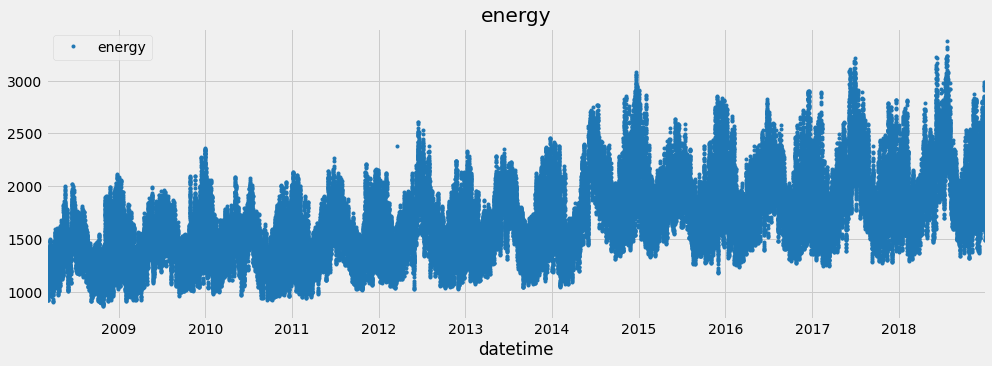

In [28]:
data.plot(style='.',
        figsize=(15, 5),
        color=color_pal[0],
        title='energy')
plt.show()


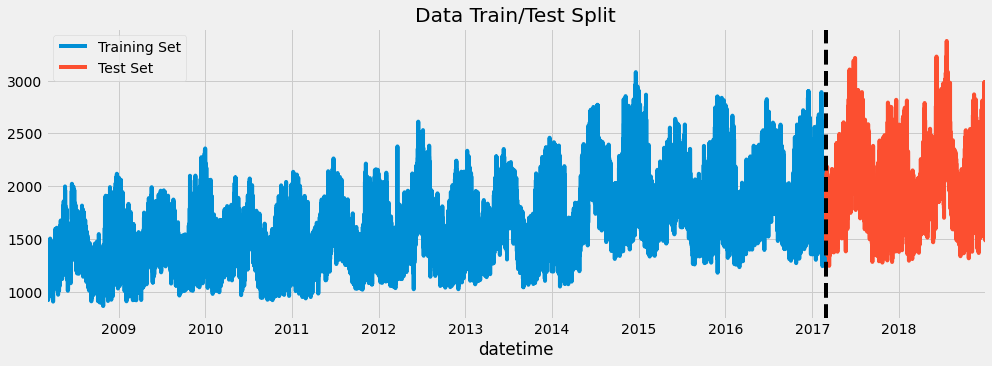

In [29]:
# set manually
CUTOFF_DATE = pd.to_datetime('2017-03-01')
TIME_DELTA = pd.DateOffset(years=9)

# splitting
train_ =data.loc[(data.index < CUTOFF_DATE) & (data.index >= CUTOFF_DATE-TIME_DELTA) ].copy()
test_ = data.loc[data.index >= CUTOFF_DATE].copy()

fig, ax = plt.subplots(figsize=(15, 5))
train_.plot(ax=ax, label='Training Set', title='Data Train/Test Split')
test_.plot(ax=ax, label='Test Set')
ax.axvline('2017-03-01', color='black', ls='--')
ax.legend(['Training Set', 'Test Set'])
plt.show()

In [30]:
data.head()

,energy
datetime,
2008-03-01 00:00:00,1259.985563
2008-03-01 01:00:00,1095.541500
2008-03-01 02:00:00,1056.247500
2008-03-01 03:00:00,1034.742000
2008-03-01 04:00:00,1026.334500


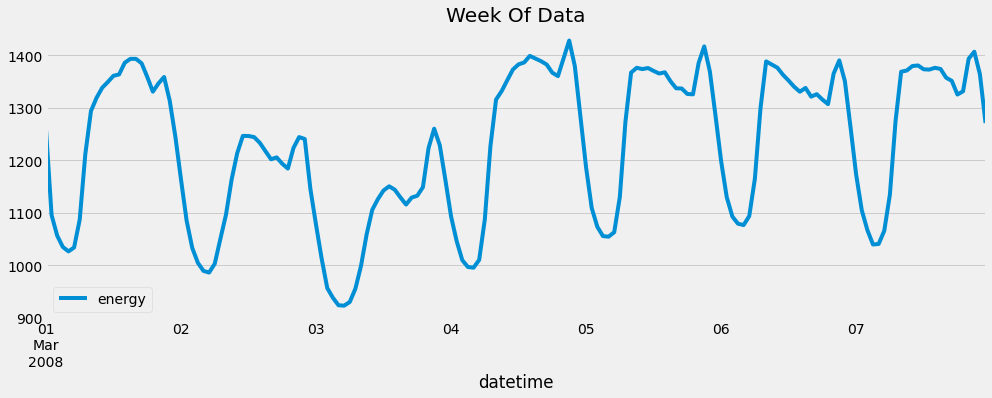

In [31]:
data.loc[(data.index >= '2008-03-01') & (data.index < '2008-03-08')] \
    .plot(figsize=(15, 5), title='Week Of Data')
plt.show()

In [32]:
def create_features(df):
    df = df.copy()
    df['hour'] = df.index.hour
    df['dayofweek'] = df.index.dayofweek
    df['quarter'] = df.index.quarter
    df['month'] = df.index.month
    df['year'] = df.index.year
    df['dayofyear'] = df.index.dayofyear
    df['dayofmonth'] = df.index.day
    df['weekofyear'] = df.index.isocalendar().week
    return df

dataframe = create_features(data)

In [33]:
dataframe_av = create_features(df_av)

In [34]:
dataframe_av

,row_id,hour,dayofweek,quarter,month,year,dayofyear,dayofmonth,weekofyear
datetime,,,,,,,,,
2019-01-01 00:00:00,94993,0,1,1,1,2019,1,1,1
2019-01-01 01:00:00,94994,1,1,1,1,2019,1,1,1
2019-01-01 02:00:00,94995,2,1,1,1,2019,1,1,1
2019-01-01 03:00:00,94996,3,1,1,1,2019,1,1,1
2019-01-01 04:00:00,94997,4,1,1,1,2019,1,1,1
...,...,...,...,...,...,...,...,...,...
2021-12-31 19:00:00,121292,19,4,4,12,2021,365,31,52
2021-12-31 20:00:00,121293,20,4,4,12,2021,365,31,52
2021-12-31 21:00:00,121294,21,4,4,12,2021,365,31,52


In [35]:
traini = create_features(train_)
testi = create_features(test_)

FEATURES = ['dayofyear', 'hour', 'dayofweek', 'quarter', 'month', 'year']
TARGET = 'energy'

X_train = traini[FEATURES]
y_train = traini[TARGET]

X_test = testi[FEATURES]
y_test = testi[TARGET]

In [36]:
X_test

,dayofyear,hour,dayofweek,quarter,month,year
datetime,,,,,,
2017-03-01 00:00:00,60,0,2,1,3,2017
2017-03-01 01:00:00,60,1,2,1,3,2017
2017-03-01 02:00:00,60,2,2,1,3,2017
2017-03-01 03:00:00,60,3,2,1,3,2017
2017-03-01 04:00:00,60,4,2,1,3,2017
...,...,...,...,...,...,...
2018-12-31 19:00:00,365,19,0,4,12,2018
2018-12-31 20:00:00,365,20,0,4,12,2018
2018-12-31 21:00:00,365,21,0,4,12,2018


In [37]:
dataframe_av = dataframe_av[['dayofyear'	,'hour'	,'dayofweek'	,'quarter',	'month'	,'year']]

In [38]:
dataframe_av

,dayofyear,hour,dayofweek,quarter,month,year
datetime,,,,,,
2019-01-01 00:00:00,1,0,1,1,1,2019
2019-01-01 01:00:00,1,1,1,1,1,2019
2019-01-01 02:00:00,1,2,1,1,1,2019
2019-01-01 03:00:00,1,3,1,1,1,2019
2019-01-01 04:00:00,1,4,1,1,1,2019
...,...,...,...,...,...,...
2021-12-31 19:00:00,365,19,4,4,12,2021
2021-12-31 20:00:00,365,20,4,4,12,2021
2021-12-31 21:00:00,365,21,4,4,12,2021


In [39]:
reg = xgb.XGBRegressor(base_score=0.5, booster='gbtree',    
                       n_estimators=1000,
                       early_stopping_rounds=50,
                       objective='reg:linear',
                       max_depth=3,
                       learning_rate=0.01)
reg.fit(X_train, y_train,
        eval_set=[(X_train, y_train), (X_test, y_test)],
        verbose=100)

[17:28:54] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[0]	validation_0-rmse:1657.07	validation_1-rmse:2027.07
[100]	validation_0-rmse:642.111	validation_1-rmse:862.282
[200]	validation_0-rmse:300.903	validation_1-rmse:466.195
[300]	validation_0-rmse:201.532	validation_1-rmse:337.489
[400]	validation_0-rmse:172.922	validation_1-rmse:290.835
[500]	validation_0-rmse:161.937	validation_1-rmse:272.476
[600]	validation_0-rmse:155.226	validation_1-rmse:262.414
[700]	validation_0-rmse:150.827	validation_1-rmse:255.934
[800]	validation_0-rmse:147.391	validation_1-rmse:251.249
[900]	validation_0-rmse:144.756	validation_1-rmse:247.93
[999]	validation_0-rmse:142.754	validation_1-rmse:245.423


XGBRegressor(early_stopping_rounds=50, learning_rate=0.01, n_estimators=1000)

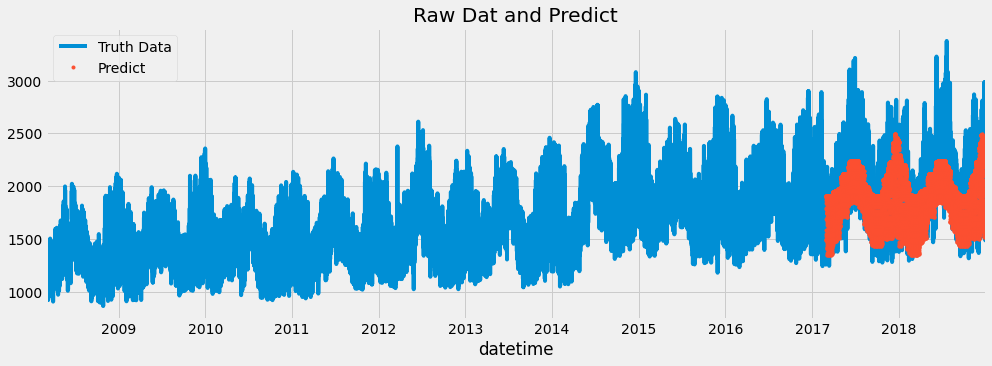

In [40]:
testi['predict'] = reg.predict(X_test)
dataframe = dataframe.merge(testi[['predict']], how='left', left_index=True, right_index=True)
ax = dataframe[['energy']].plot(figsize=(15, 5))
dataframe['predict'].plot(ax=ax, style='.')
plt.legend(['Truth Data', 'Predict'])
ax.set_title('Raw Dat and Predict')
plt.show()

In [41]:
testifor_av = testi

In [42]:
pred_av = reg.predict(dataframe_av)

In [43]:
pred_av_list = list(pred_av)

In [44]:
###jobathon

In [45]:
df_av['row_id']

datetime
2019-01-01 00:00:00     94993
2019-01-01 01:00:00     94994
2019-01-01 02:00:00     94995
2019-01-01 03:00:00     94996
2019-01-01 04:00:00     94997
                        ...  
2021-12-31 19:00:00    121292
2021-12-31 20:00:00    121293
2021-12-31 21:00:00    121294
2021-12-31 22:00:00    121295
2021-12-31 23:00:00    121296
Name: row_id, Length: 26304, dtype: int64

In [ ]:
out_xgboost = pd.DataFrame()
out_xgboost["row_id"] = test_av['row_id']
out_xgboost["energy"] = pred_av_list
out_xgboost.to_csv("XGBOOST_Forecast.csv", index=False)

In [ ]:
####@

In [48]:
score = np.sqrt(mean_squared_error(testi['energy'], testi['predict']))
print(f'RMSE Score on Test set: {score:0.2f}')

RMSE Score on Test set: 245.42


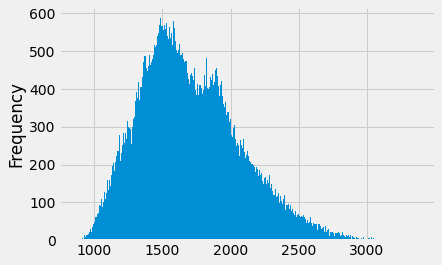

In [49]:
dataframe['energy'].plot(kind='hist', bins=500)

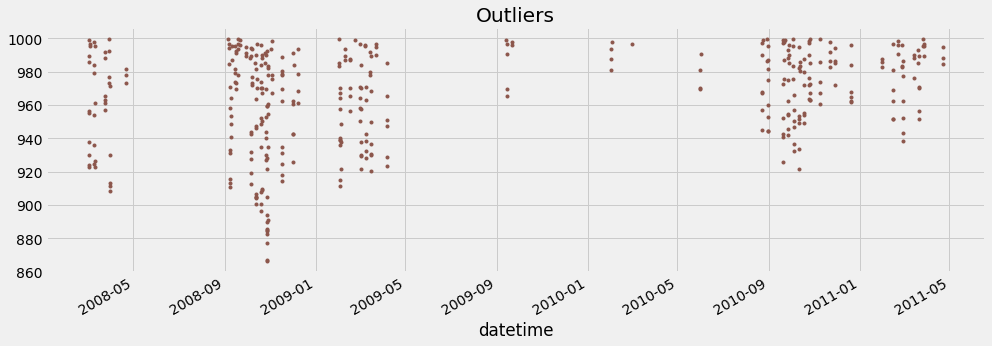

In [50]:
dataframe.query('energy < 1_000')['energy'] \
    .plot(style='.',
          figsize=(15, 5),
          color=color_pal[5],
          title='Outliers')

In [51]:
dataframe = dataframe.query('energy > 3_000').copy()

In [52]:
from sklearn.model_selection import TimeSeriesSplit

tss = TimeSeriesSplit(n_splits=5, test_size=24*365*1, gap=24)
df = df.sort_index()

In [53]:
df

,row_id,energy
datetime,,
2008-03-01 00:00:00,1,1259.985563
2008-03-01 01:00:00,2,1095.541500
2008-03-01 02:00:00,3,1056.247500
2008-03-01 03:00:00,4,1034.742000
2008-03-01 04:00:00,5,1026.334500
...,...,...
2018-12-31 19:00:00,94988,2528.446800
2018-12-31 20:00:00,94989,2461.883600
2018-12-31 21:00:00,94990,2365.994400


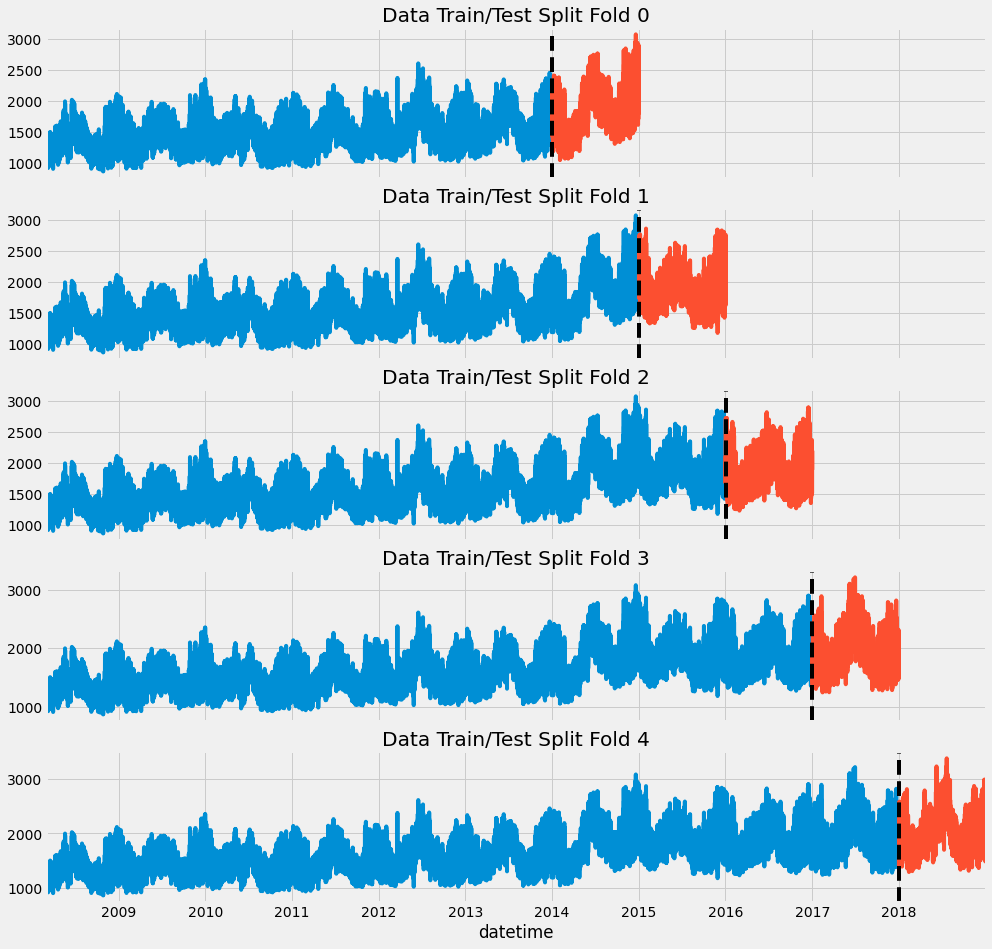

In [54]:
fig, axs = plt.subplots(5, 1, figsize=(15, 15), sharex=True)

fold = 0
for traink_idx, val_idx in tss.split(df):
    traink = df.iloc[traink_idx]
    testk = df.iloc[val_idx]
    traink['energy'].plot(ax=axs[fold],
                          label='Training Set',
                          title=f'Data Train/Test Split Fold {fold}')
    testk['energy'].plot(ax=axs[fold],
                         label='Test Set')
    axs[fold].axvline(testk.index.min(), color='black', ls='--')
    fold += 1
plt.show()

In [55]:
def create_features(df):
    """
    Create time series features based on time series index.
    """
    df = df.copy()
    df['hour'] = df.index.hour
    df['dayofweek'] = df.index.dayofweek
    df['quarter'] = df.index.quarter
    df['month'] = df.index.month
    df['year'] = df.index.year
    df['dayofyear'] = df.index.dayofyear
    df['dayofmonth'] = df.index.day
    df['weekofyear'] = df.index.isocalendar().week
    return df

df_forCV = create_features(df)


In [58]:
def add_lags(df):
    target_map = df['energy'].to_dict()
    df['lag1'] = (df.index - pd.Timedelta('364 days')).map(target_map)
    df['lag2'] = (df.index - pd.Timedelta('728 days')).map(target_map)
    df['lag3'] = (df.index - pd.Timedelta('1092 days')).map(target_map)
    return df

In [59]:
df = add_lags(df_forCV)

In [60]:
tss = TimeSeriesSplit(n_splits=5, test_size=24*365*1, gap=24)
df = df.sort_index()


fold = 0
preds = []
scores = []
for train_idx, val_idx in tss.split(df_forCV):
    train = df.iloc[train_idx]
    test = df.iloc[val_idx]

    train = create_features(train)
    test = create_features(test)

    FEATURES = ['dayofyear', 'hour', 'dayofweek', 'quarter', 'month','year',
                'lag1','lag2','lag3']
    TARGET = 'energy'

    X_train = train[FEATURES]
    y_train = train[TARGET]

    X_test = test[FEATURES]
    y_test = test[TARGET]

    reg = xgb.XGBRegressor(base_score=0.5, booster='gbtree',    
                           n_estimators=1000,
                           early_stopping_rounds=50,
                           objective='reg:linear',
                           max_depth=3,
                           learning_rate=0.01)
    reg.fit(X_train, y_train,
            eval_set=[(X_train, y_train), (X_test, y_test)],
            verbose=100)

    y_pred = reg.predict(X_test)
    preds.append(y_pred)
    score = np.sqrt(mean_squared_error(y_test, y_pred))
    scores.append(score)

[17:34:24] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[0]	validation_0-rmse:1507.75	validation_1-rmse:1889.94
[100]	validation_0-rmse:572.978	validation_1-rmse:861.39
[200]	validation_0-rmse:254.235	validation_1-rmse:493.702
[300]	validation_0-rmse:163.977	validation_1-rmse:369.25
[400]	validation_0-rmse:141.999	validation_1-rmse:322.768
[500]	validation_0-rmse:135.385	validation_1-rmse:304.993
[600]	validation_0-rmse:132.215	validation_1-rmse:297.477
[700]	validation_0-rmse:129.774	validation_1-rmse:293.522
[800]	validation_0-rmse:127.773	validation_1-rmse:291.687
[900]	validation_0-rmse:126.144	validation_1-rmse:290.674
[999]	validation_0-rmse:124.754	validation_1-rmse:289.518
[17:35:02] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[0]	validation_0-rmse:1568.86	validation_1-rmse:1909.16
[100]	validation_0-rmse:597.968	validation_1-rmse:701.71

In [61]:
print(f'Score across folds {np.mean(scores):0.4f}')
print(f'Fold scores:{scores}')

Score across folds 244.2494
Fold scores:[289.5184155280934, 284.2062955529758, 213.04639697051542, 227.96991157206415, 206.5061434992828]


In [62]:
# Retrain on all data
df = create_features(df)

FEATURES = ['dayofyear', 'hour', 'dayofweek', 'quarter', 'month', 'year',
            'lag1','lag2','lag3']
TARGET = 'energy'

X_all = df[FEATURES]
y_all = df[TARGET]

reg = xgb.XGBRegressor(base_score=0.5,
                       booster='gbtree',    
                       n_estimators=500,
                       objective='reg:linear',
                       max_depth=3,
                       learning_rate=0.01)
reg.fit(X_all, y_all,
        eval_set=[(X_all, y_all)],
        verbose=100)


[17:39:18] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[0]	validation_0-rmse:1725.06
[100]	validation_0-rmse:658.021
[200]	validation_0-rmse:296.694
[300]	validation_0-rmse:195.999
[400]	validation_0-rmse:172.587
[499]	validation_0-rmse:164.852


XGBRegressor(learning_rate=0.01, n_estimators=500)

In [ ]:
df.index.max()

In [64]:
test_av.tail()

,row_id,datetime
26299,121292,2021-12-31 19:00:00
26300,121293,2021-12-31 20:00:00
26301,121294,2021-12-31 21:00:00
26302,121295,2021-12-31 22:00:00
26303,121296,2021-12-31 23:00:00


In [109]:
# Create future dataframe
future = pd.date_range('2019-01-01','2022-01-01', freq='1h')
future_df = pd.DataFrame(index=future)
future_df['isFuture'] = True
df['isFuture'] = False
df_and_future = pd.concat([df, future_df])
df_and_future = create_features(df_and_future)
df_and_future = add_lags(df_and_future)


In [110]:
future_w_features = df_and_future.query('isFuture').copy()

In [111]:
future_w_features['pred'] = reg.predict(future_w_features[FEATURES])

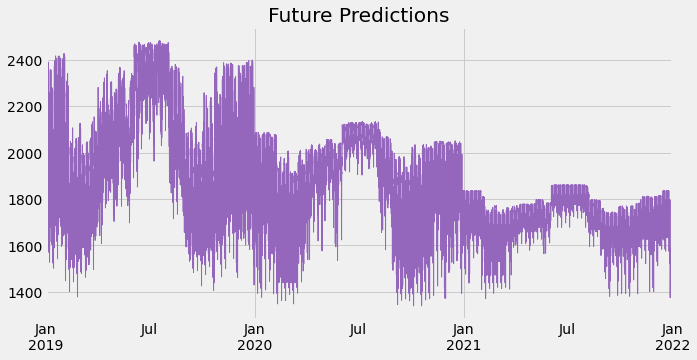

In [112]:
future_w_features['pred'].plot(figsize=(10, 5),
                               color=color_pal[4],
                               ms=1,
                               lw=1,
                               title='Future Predictions')
plt.show()

In [113]:
 final_pred= list(future_w_features['pred'])

In [122]:
 print(len(final_pred))

26304


In [120]:
ele

1396.9471435546875

In [119]:
print(len(ele))

TypeError: ignored

In [114]:
future_w_features

,row_id,energy,hour,dayofweek,quarter,month,year,dayofyear,dayofmonth,weekofyear,lag1,lag2,lag3,isFuture,pred
2019-01-01 00:00:00,NaN,NaN,0,1,1,1,2019,1,1,1,1778.7056,1634.8527,1884.8128,True,1844.863281
2019-01-01 01:00:00,NaN,NaN,1,1,1,1,2019,1,1,1,1666.9772,1553.6367,1771.9000,True,1761.742554
2019-01-01 02:00:00,NaN,NaN,2,1,1,1,2019,1,1,1,1580.7792,1469.7558,1675.1176,True,1653.877441
2019-01-01 03:00:00,NaN,NaN,3,1,1,1,2019,1,1,1,1523.1384,1440.9495,1623.6714,True,1634.849731
2019-01-01 04:00:00,NaN,NaN,4,1,1,1,2019,1,1,1,1513.2684,1432.1934,1587.6224,True,1622.830322
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2021-12-31 20:00:00,NaN,NaN,20,4,4,12,2021,365,31,52,NaN,NaN,NaN,True,1590.906860
2021-12-31 21:00:00,NaN,NaN,21,4,4,12,2021,365,31,52,NaN,NaN,NaN,True,1590.906860
2021-12-31 22:00:00,NaN,NaN,22,4,4,12,2021,365,31,52,NaN,NaN,NaN,True,1590.906860
2021-12-31 23:00:00,NaN,NaN,23,4,4,12,2021,365,31,52,NaN,NaN,NaN,True,1590.906860


In [115]:
print(len(final_pred))

26305


In [116]:
test_av

,row_id,datetime
0,94993,2019-01-01 00:00:00
1,94994,2019-01-01 01:00:00
2,94995,2019-01-01 02:00:00
3,94996,2019-01-01 03:00:00
4,94997,2019-01-01 04:00:00
...,...,...
26299,121292,2021-12-31 19:00:00
26300,121293,2021-12-31 20:00:00
26301,121294,2021-12-31 21:00:00
26302,121295,2021-12-31 22:00:00


In [123]:
final_pred_ = pd.DataFrame()
final_pred_["row_id"] = test_av['row_id']
final_pred_["energy"] = final_pred
final_pred_.to_csv("final_pred.csv", index=False)